In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import fitsio
#https://pypi.org/project/fitsio/

# --- GALAXY-LRG ---

In [4]:
fits_tru = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_true_mod.fits')

In [5]:
fits_tar = fitsio.FITS('/home/sd.lobo251/Documents/dc17b/data_tar_mod.fits')

In [50]:
#funtion to select specific data from the original data_set


def select_dataset(name_to_select, target_column, true_data, tar_data):
    
    '''
    returns data_set_1 and data-set_2 with only the data corresponding to name_to_select
    '''
    n_rows = len(true_data[1][target_column][:])

    true_array_to_return = []
    tar_array_to_return = []
    for i in range(n_rows):
        name_in_file = true_data[1][target_column][i]
        if name_to_select == name_in_file:
            true_array_to_return.append(true_data[1][i])
            tar_array_to_return.append(tar_data[1][i])
            
    true_array_to_return = array(true_array_to_return)
    tar_array_to_return = array(tar_array_to_return)
    
    return true_array_to_return, tar_array_to_return

    

In [51]:
#getting the data of only the rows thar are LRG:
true_1, tar_2 = select_dataset(b'LRG       ', 'TEMPLATETYPE', fits_tru, fits_tar)

In [56]:
#create the fits file for LRG only
LRG_file_true = fitsio.FITS('LRG_true', 'rw')
LRG_file_tar = fitsio.FITS('LRG_tar', 'rw')

In [57]:
#adds the data in true_1 y tar_2 to the LRG fits files:
LRG_file_true.write(true_1)
LRG_file_tar.write(tar_2)

In [67]:
#veryfy that there is only LRG TYPE
print(unique(LRG_file_true[1]['TEMPLATETYPE'][:]))

[b'LRG       ']


(0.3, 1.5)

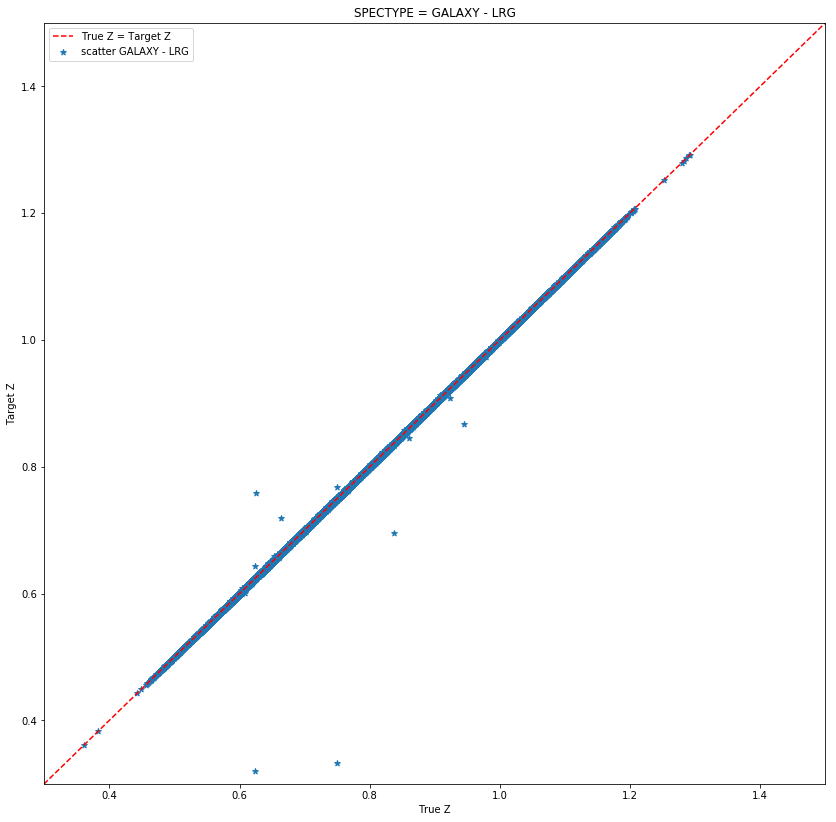

In [93]:
# grafica
x_f = linspace(0, 4.0, 100)

fig, ax = subplots(figsize=(14, 14))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter(LRG_file_true[1]['TRUEZ'][:], LRG_file_tar[1]['Z'][:], marker='*')
ax.legend(('True Z = Target Z', 'scatter GALAXY - LRG'))
ax.set_xlabel('True Z')
ax.set_ylabel('Target Z')
ax.set_title('SPECTYPE = GALAXY - LRG')
ax.set_xlim(0.3, 1.5)
ax.set_ylim(0.3, 1.5)

In [99]:
print('unique SPECTYPE in tar file: ', unique(LRG_file_tar[1]['SPECTYPE'][:]))
print('unique SPECTYPE in true file: ', unique(LRG_file_true[1]['TRUESPECTYPE'][:]))
print('unique SUBTYPE in tar file: ', unique(LRG_file_tar[1]['SUBTYPE'][:]))


unique SPECTYPE in tar file:  [b'GALAXY' b'QSO   ']
unique SPECTYPE in true file:  [b'GALAXY    ']
unique SUBTYPE in tar file:  [b' ']


In [92]:
unique(fits_tar[1]['SPECTYPE'][:])

array([b'GALAXY', b'QSO   ', b'STAR  '],
      dtype='|S6')

In [104]:
#counting the number of QSOs in the LRG_tar dataset:

QSOs_in_LRG = []

for i in range(len(LRG_file_tar[1][:])):
    spectype_name = LRG_file_tar[1]['SPECTYPE'][i]
    if spectype_name == b'QSO   ':
        QSOs_in_LRG.append(LRG_file_tar[1][i])
        print(i)
QSOs_in_LRG = array(QSOs_in_LRG) 

64182


In [105]:
#only one row is misclassified!

In [107]:
fits_tru[1]


  file: /home/sd.lobo251/Documents/dc17b/data_true_mod.fits
  extension: 1
  type: BINARY_TBL
  rows: 2131896
  column info:
    TARGETID            i8  
    MOCKID              i8  
    CONTAM_TARGET       i8  
    TRUEZ               f4  
    TRUESPECTYPE       S10  
    TEMPLATETYPE       S10  
    TEMPLATESUBTYPE    S10  
    TEMPLATEID          i4  
    SEED                i8  
    MAG                 f4  
    FLUX_G              f4  
    FLUX_R              f4  
    FLUX_Z              f4  
    FLUX_W1             f4  
    FLUX_W2             f4  
    OIIFLUX             f4  
    HBETAFLUX           f4  
    TEFF                f4  
    LOGG                f4  
    FEH                 f4  

Text(0.5,1,'SPECTYPE = GALAXY - LRG')

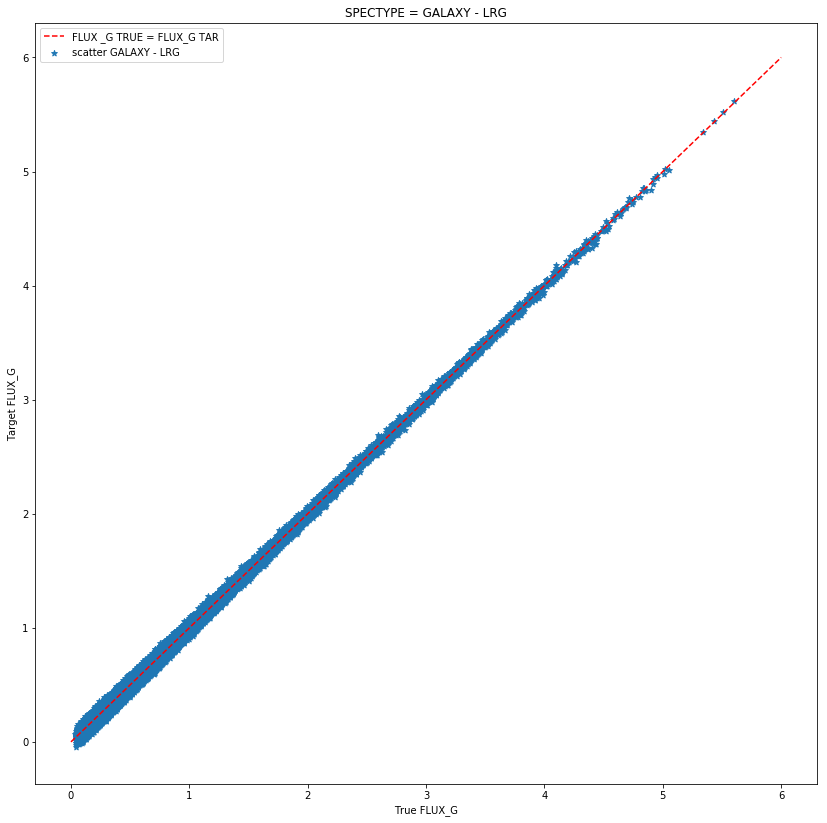

In [112]:
# grafica
x_f = linspace(0, 6.0, 100)

fig, ax = subplots(figsize=(14, 14))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter(LRG_file_true[1]['FLUX_G'][:], LRG_file_tar[1]['FLUX_G'][:], marker='*')
ax.legend(('FLUX _G TRUE = FLUX_G TAR', 'scatter GALAXY - LRG'))
ax.set_xlabel('True FLUX_G')
ax.set_ylabel('Target FLUX_G')
ax.set_title('SPECTYPE = GALAXY - LRG')
#ax.set_xlim(0.3, 1.5)
#ax.set_ylim(0.3, 1.5)

Text(0.5,1,'SPECTYPE = GALAXY - LRG')

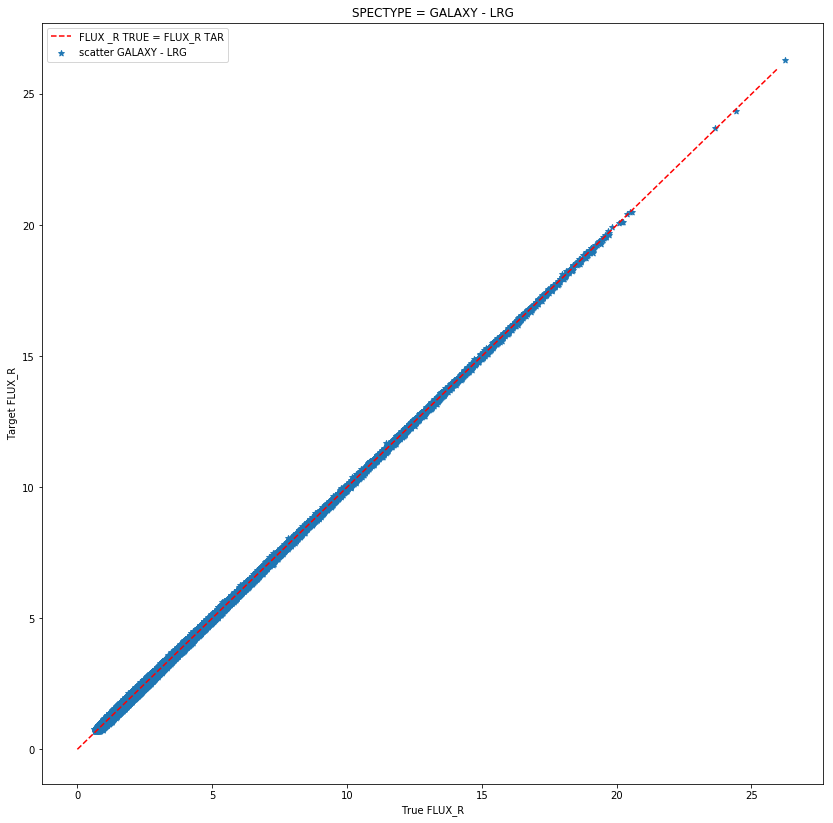

In [113]:

# grafica
x_f = linspace(0, 26, 100)

fig, ax = subplots(figsize=(14, 14))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter(LRG_file_true[1]['FLUX_R'][:], LRG_file_tar[1]['FLUX_R'][:], marker='*')
ax.legend(('FLUX _R TRUE = FLUX_R TAR', 'scatter GALAXY - LRG'))
ax.set_xlabel('True FLUX_R')
ax.set_ylabel('Target FLUX_R')
ax.set_title('SPECTYPE = GALAXY - LRG')
#ax.set_xlim(0.3, 1.5)
#ax.set_ylim(0.3, 1.5)

Text(0.5,1,'SPECTYPE = GALAXY - LRG')

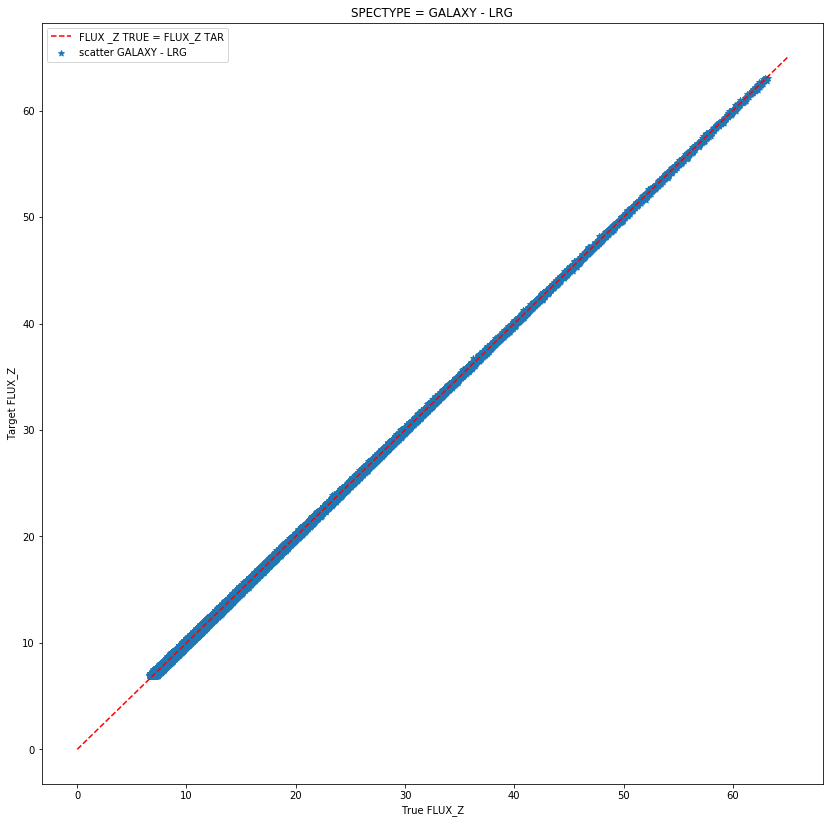

In [115]:
# grafica
x_f = linspace(0, 65, 100)

fig, ax = subplots(figsize=(14, 14))
ax.plot(x_f, x_f, '--', color='r')
ax.scatter(LRG_file_true[1]['FLUX_Z'][:], LRG_file_tar[1]['FLUX_Z'][:], marker='*')
ax.legend(('FLUX _Z TRUE = FLUX_Z TAR', 'scatter GALAXY - LRG'))
ax.set_xlabel('True FLUX_Z')
ax.set_ylabel('Target FLUX_Z')
ax.set_title('SPECTYPE = GALAXY - LRG')
#ax.set_xlim(0.3, 1.5)
#ax.set_ylim(0.3, 1.5)

In [116]:
min(LRG_file_tar[1]['Z'][:])

0.32016172507696133

In [118]:
where(LRG_file_tar[1]['Z'][:] == 0.32016172507696133)

(array([279849]),)

In [121]:
print(LRG_file_tar[1][279849])

[ (288230494481420027, b'1707p162', 3835,  170.67150879,  16.32132149,  0.33621696,  1.78172791,  8.7601347,  27.84661865,  16.08104897,  0.366624,  0.00055891,  0.00128782, -0.00032375, -0.00041133, -0.00082453,  24.59725761,  24.12309456,  24.02225685,  24.29251099,  23.87824821,  23.72989655,  0.92472965,  0.94865227,  0.97070891,  0.99553001,  0.99725246, 423488, 65537, 0, 0, 28212,  0.01674556, 1,  7158.63538127, [ -67.66409467,  278.66798748,  -52.10136596,   32.00124304,  -66.60047922,    2.32564557,   -6.73055514,  -32.6868076 ,  -13.73986539,   21.24496727],  0.32016173,   4.15629214e-05, 4, b'GALAXY', b' ',  1.52617386)]


In [122]:
print(LRG_file_true[1][279849])

[ (288230494481420027, 4465864, 0,  0.62415659, b'GALAXY    ', b'LRG       ', b'          ', 117, 1749988031,  20.14689827,  0.3361198,  1.92044413,  8.73455334,  26.16793442,  16.11726379, -1., -1., -1., -1., -1.)]


In [123]:
#find the outliers:

miscla_index = []
for i in range(len(LRG_file_tar[1][:])):
    if abs(LRG_file_tar[1]['Z'][i] - LRG_file_true[1]['TRUEZ'][i]) > 0.01:
        miscla_index.append(i)
        

In [125]:
for i in miscla_index:
    print('{} {} {} {}'.format(LRG_file_tar[1]['FLUX_G'][i], LRG_file_tar[1]['FLUX_R'][i], LRG_file_tar[1]['FLUX_Z'][i], LRG_file_tar[1]['FLUX_W1'][i], LRG_file_tar[1]['FLUX_W2'][i]))
    

[ 0.4254128] [ 1.84435987] [ 7.84413433] [ 18.80839729]
[ 0.17857544] [ 1.24065232] [ 7.06081676] [ 26.78140068]
[ 0.34177116] [ 1.76582646] [ 7.54055309] [ 24.16856194]
[ 0.27865529] [ 1.72260022] [ 7.41935682] [ 25.24465561]
[ 0.37590599] [ 2.10821271] [ 8.81440449] [ 25.25117874]
[ 0.10892053] [ 1.02300858] [ 7.54314184] [ 39.54784393]
[ 0.24007407] [ 1.40152395] [ 6.97401714] [ 21.46751976]
[ 0.31120434] [ 1.66220427] [ 7.274611] [ 19.91464424]
[ 0.24394397] [ 1.3572464] [ 7.04931164] [ 17.68863487]
[ 0.33621696] [ 1.78172791] [ 8.7601347] [ 27.84661865]


In [127]:
for i in miscla_index:
    print('{} {} {} {}'.format(LRG_file_true[1]['FLUX_G'][i], LRG_file_true[1]['FLUX_R'][i], LRG_file_true[1]['FLUX_Z'][i], LRG_file_true[1]['FLUX_W1'][i], LRG_file_true[1]['FLUX_W2'][i]))
    

[ 0.37702912] [ 1.88535237] [ 7.74397755] [ 18.76527214]
[ 0.18705083] [ 1.25470769] [ 6.98594761] [ 28.14190483]
[ 0.35854995] [ 1.82295394] [ 7.57997322] [ 22.95854378]
[ 0.30759314] [ 1.70881605] [ 7.63612032] [ 23.85462761]
[ 0.40350369] [ 2.13904762] [ 8.43966579] [ 25.18187904]
[ 0.08171483] [ 1.04403102] [ 7.48535919] [ 38.95830917]
[ 0.23755871] [ 1.38083959] [ 6.83372164] [ 23.8126297]
[ 0.34151927] [ 1.75034964] [ 7.11821699] [ 20.74921799]
[ 0.2644715] [ 1.36966741] [ 6.84823895] [ 18.04554558]
[ 0.3361198] [ 1.92044413] [ 8.73455334] [ 26.16793442]


In [143]:
a_1 = [LRG_file_true[1]['FLUX_W1'][i] for i in miscla_index]
a_2 = [LRG_file_tar[1]['FLUX_W1'][i] for i in miscla_index]
j = linspace(0, 40, 10)

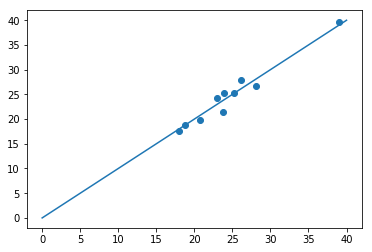

In [144]:
scatter(a_1, a_2)
plot(j, j)

In [145]:
#Qué tienen en común estos puntos????